/tmp/ipykernel_3905529/2859743176.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('test_with_predictions_with_correct_mapping.csv')


Total correct mappings: 8023
Total ship MDM counts: 9692
Average Mapping Accuracy: 82.78%
Total correct mappings inference: 8752
Total ship MDM counts inference: 9692
Average Mapping Accuracy inference: 90.30%


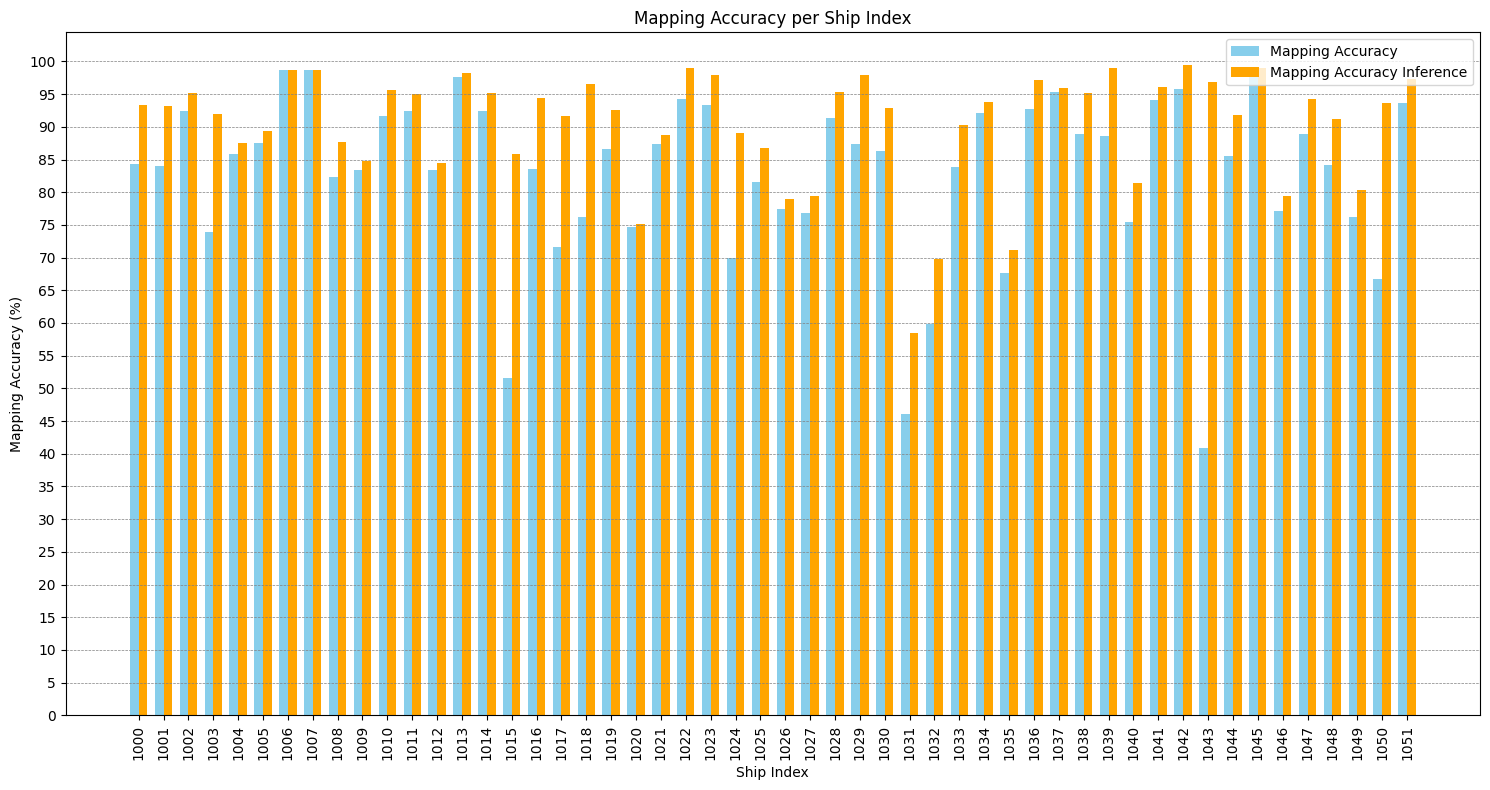

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the data
df_test = pd.read_csv('test_with_predictions_with_correct_mapping.csv')

# Count the number of rows for each ships_idx
ship_rows_counts = df_test.groupby('ships_idx').size()

# Filter the DataFrame where 'MDM' is True and then count the rows for each ships_idx
ship_mdm_counts = df_test[df_test['MDM'] == True].groupby('ships_idx').size()

# Calculate correct mappings for first set of conditions
correct_mappings = df_test[(df_test['correct_mapping'] == True)].groupby('ships_idx').size()

# Combine the three Series into a DataFrame with appropriate column names
result = pd.concat([ship_rows_counts, ship_mdm_counts, correct_mappings], axis=1)
result.columns = ['ship_rows_counts', 'ship_mdm_counts', 'correct_mappings']

# Reset index to turn the index into a regular column if necessary
result = result.reset_index()

# Fill NaN values with 0 where there are no mappings or mdm counts
result['ship_mdm_counts'] = result['ship_mdm_counts'].fillna(0)
result['correct_mappings'] = result['correct_mappings'].fillna(0)

# Calculate mapping accuracy and handle division by zero by replacing infinity with NaN or zero
result['mapping_accuracy'] = result['correct_mappings'] / result['ship_mdm_counts'].replace({0: pd.NA})

# Replace infinite values with NaN if there were division by zero cases
result['mapping_accuracy'] = result['mapping_accuracy'].fillna(0)

# Convert to percentage if desired
result['mapping_accuracy'] *= 100

# Calculate the average mapping accuracy
total_correct_mappings = result['correct_mappings'].sum()
total_ship_mdm_counts = result['ship_mdm_counts'].sum()
average_mapping_accuracy = (total_correct_mappings / total_ship_mdm_counts) * 100 if total_ship_mdm_counts != 0 else 0

# Print the total counts and average mapping accuracy
print(f"Total correct mappings: {total_correct_mappings}")
print(f"Total ship MDM counts: {total_ship_mdm_counts}")
print(f"Average Mapping Accuracy: {average_mapping_accuracy:.2f}%")

# Calculate correct mappings for second set of conditions
correct_mappings_inference = df_test[
    (df_test['p_thing_correct'] == True) &
    (df_test['p_property_correct'] == True) &
    (df_test['MDM'] == True)
].groupby('ships_idx').size()

# Combine the three Series into a DataFrame with appropriate column names
result_inference = pd.concat([ship_rows_counts, ship_mdm_counts, correct_mappings_inference], axis=1)
result_inference.columns = ['ship_rows_counts', 'ship_mdm_counts', 'correct_mappings_inference']

# Reset index to turn the index into a regular column if necessary
result_inference = result_inference.reset_index()

# Fill NaN values with 0 where there are no mappings or mdm counts
result_inference['ship_mdm_counts'] = result_inference['ship_mdm_counts'].fillna(0)
result_inference['correct_mappings_inference'] = result_inference['correct_mappings_inference'].fillna(0)

# Calculate mapping accuracy and handle division by zero by replacing infinity with NaN or zero
result_inference['mapping_accuracy_inference'] = result_inference['correct_mappings_inference'] / result_inference['ship_mdm_counts'].replace({0: pd.NA})

# Replace infinite values with NaN if there were division by zero cases
result_inference['mapping_accuracy_inference'] = result_inference['mapping_accuracy_inference'].fillna(0)

# Convert to percentage if desired
result_inference['mapping_accuracy_inference'] *= 100

# Calculate the average mapping accuracy
total_correct_mappings_inference = result_inference['correct_mappings_inference'].sum()
total_ship_mdm_counts_inference = result_inference['ship_mdm_counts'].sum()
average_mapping_accuracy_inference = (total_correct_mappings_inference / total_ship_mdm_counts_inference) * 100 if total_ship_mdm_counts_inference != 0 else 0

# Print the total counts and average mapping accuracy
print(f"Total correct mappings inference: {total_correct_mappings_inference}")
print(f"Total ship MDM counts inference: {total_ship_mdm_counts_inference}")
print(f"Average Mapping Accuracy inference: {average_mapping_accuracy_inference:.2f}%")

# Plotting the combined results
plt.figure(figsize=(15, 8))  # Adjust the size as needed

# Define the width of the bars and calculate positions for each group
width = 0.35  # the width of the bars
r1 = range(len(result['ships_idx']))  # positions for the first set of bars
r2 = [x + width for x in r1]  # positions for the second set of bars

# Plot the bars
plt.bar(r1, result['mapping_accuracy'], width=width, label='Mapping Accuracy', color='skyblue')
plt.bar(r2, result_inference['mapping_accuracy_inference'], width=width, label='Mapping Accuracy Inference', color='orange')

plt.title('Mapping Accuracy per Ship Index')
plt.xlabel('Ship Index')
plt.ylabel('Mapping Accuracy (%)')

# Set y-axis ticks to increment by 5
plt.yticks(range(0, 101, 5))  # Assuming the accuracy percentage ranges from 0 to 100

# Add horizontal grid lines for better readability, only horizontal by setting axis='y'
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='grey')

# Rotate x-axis labels to prevent overlap
plt.xticks([r + width / 2 for r in range(len(result['ships_idx']))], result['ships_idx'], rotation=90)

# Create legend & Show plot
plt.legend()
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()
